# ベイズの基礎
## ベルヌーイ分布
尤度及びパラメータの事前分布を以下のように定める．
$$
p(x | \mu) = \mu^x (1 - \mu)^{1 - x} \\
p(\mu) = \text{Beta}(\mu | a, b)
$$

このとき，パラメータの事後分布は以下のようになる．
$$
p(\mu | x) = \text{Beta}(\mu | a + x, b + 1 - x)
$$

データが$n$個与えられた時のパラメータの事後分布は以下のようになる．
$$
p(\mu | x_1, \cdots, x_n) = \text{Beta}(\mu | a + \sum_{i=1}^n x_i, b + n - \sum_{i=1}^n x_i)
$$

期待値は
$$
\mathbb{E}[\mu] = \frac{a + \sum_{i=1}^n x_i}{a + b + n}
$$

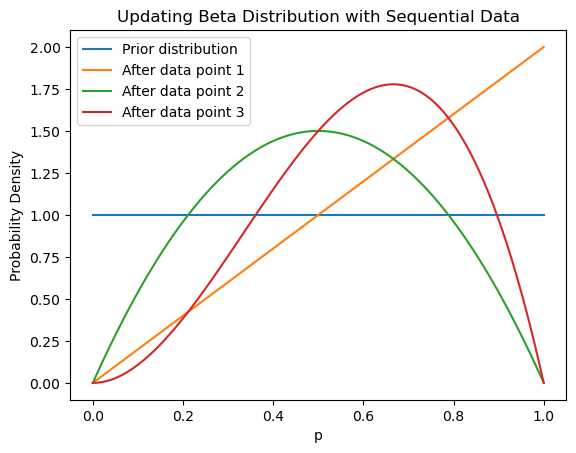

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist

# ベータ分布のパラメータを更新する関数
def update_beta_parameters(alpha_param, beta_param, data):
    return alpha_param + sum(data), beta_param + len(data) - sum(data)

# 初期パラメータ (これは一様分布を意味する)
alpha_param = 1
beta_param = 1

# 逐次的に与えられるデータの例 (1: 成功, 0: 失敗)
data_stream = [1, 0, 1]

# パラメータと分布をプロットするための準備
x = np.linspace(0, 1, 100)

# 初期の事前分布をプロット
plt.plot(x, beta_dist.pdf(x, alpha_param, beta_param), label='Prior distribution')

# データポイントごとにパラメータを更新
for i, data_point in enumerate(data_stream):
    # 新しいデータ点でパラメータを更新
    alpha_param, beta_param = update_beta_parameters(alpha_param, beta_param, [data_point])
    
    # 更新された分布をプロット
    plt.plot(x, beta_dist.pdf(x, alpha_param, beta_param), label=f'After data point {i+1}')

# グラフ表示設定
plt.title('Updating Beta Distribution with Sequential Data')
plt.xlabel('p')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## ポアソン分布
尤度及びパラメータの事前分布を以下のように定める．
$$
p(x | \lambda) = \frac{\lambda^x}{x!} \exp{(-\lambda)} \\
p(\lambda) = \text{Ga}(\lambda | a, b)
$$

このとき，パラメータの事後分布は以下のようになる．
$$
p(\lambda | x) = \text{Ga}(\lambda | a + \sum_{i=1}^n x_i, b + n)
$$

データが$n$個与えられた時のパラメータの事後分布は以下のようになる．
$$
p(\lambda | x_1, \cdots, x_n) = \text{Ga}(\lambda | a + \sum_{i=1}^n x_i, b + n)
$$

期待値は
$$
\mathbb{E}[\lambda] = \frac{a + \sum_{i=1}^n x_i}{b + n}
$$

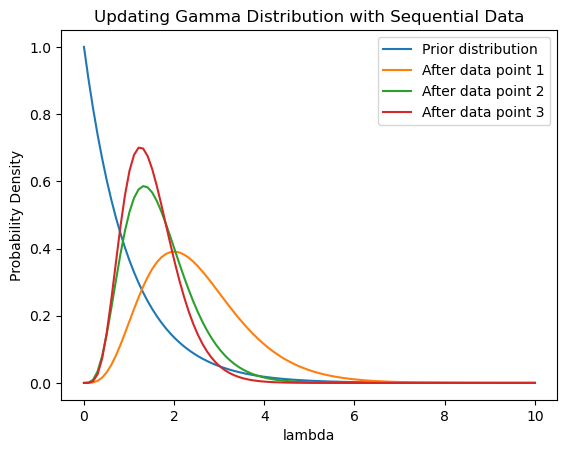

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

def update_gamma_parameters(alpha, beta, data):
    return alpha + sum(data), beta + len(data)

# 初期パラメータ
alpha = 1
beta = 1

# 逐次的に与えられるデータの例 (ポアソン分布のデータ点)
data_stream = [4, 0, 1]

# パラメータと分布をプロットするための準備
x = np.linspace(0, 10, 100)

# 初期の事前分布をプロット
plt.plot(x, gamma.pdf(x, alpha, scale=1/beta), label='Prior distribution')

# データポイントごとにパラメータを更新
for i, data_point in enumerate(data_stream):
    # 新しいデータ点でパラメータを更新
    alpha, beta = update_gamma_parameters(alpha, beta, [data_point])
    
    # 更新された分布をプロット
    plt.plot(x, gamma.pdf(x, alpha, scale=1/beta), label=f'After data point {i+1}')

# グラフ表示設定
plt.title('Updating Gamma Distribution with Sequential Data')
plt.xlabel('lambda')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


## 解析的に難しい場合
尤度をベルヌーイ分布，パラメータの事前分布をガウス分布とした場合はどうでしょうか？

つまり，以下のように設定します．
$$
p(x | \mu) = \mu^x (1 - \mu)^{1 - x} \\
p(\mu) = \mathcal{N}(\mu | \mu_0, \sigma_0^2)
$$

データが$n$個与えられたときのパラメータの事後分布は
$$
p(\mu | x_1, \cdots, x_n) = \frac{1}{\mathcal{Z}} \Pi_i \mu^{x_i}(1-\mu)^{1-x_i}\exp{\left\{ - \frac{1}{2\sigma_0^2}(\mu-\mu_0)^2\right\}}
$$

### ラプラス近似
連続変数の集合上に定義されている確率変数関数に対して，ガウス分布による近似を見出すことを目的としています．

以下にラプラス近似の流れを説明します．

求めたい分布$p(\vec{x})$として
$$
p(\vec{x}) = \frac{1}{Z} f(\vec{x})
$$
と書けるとします．

まずはピークを見つけます．

つまり
$$
\frac{\partial p(\vec{x}_0)}{\partial \vec{x}} = 0
$$
を満たす$\vec{x}_0$を求めます．

次に，対数を取ってその$x_0$点周りでテイラー展開をします．
$$
\log p(\vec{x}) = \log p(\vec{x}_0) + \frac{1}{2}(\vec{x} - \vec{x}_0)^T \nabla \nabla \log p(\vec{x}_0) (\vec{x} - \vec{x}_0) + \cdots
$$

ここで，$\textbf{A} = - \nabla \nabla \log p(\vec{x}_0)$をヘッセ行列と定義します．

そのヘッセ行列を用いて以下のように近似をします．
$$
p(\vec{x}) \approx \frac{|\textbf{A}|^{1/2}}{2\pi^{M/2}} \exp \left( - \frac{1}{2} (\vec{x} - \vec{x}_0)^T \textbf{A} (\vec{x} - \vec{x}_0) \right)
$$


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 範囲を定義
x = np.linspace(-np.pi, np.pi, 1000)

# cos関数
f = np.cos(x)

# cos関数の導関数
def df(x):
    return -np.sin(x)

# cos関数の二階導関数
def ddf(x):
    return -np.cos(x)

In [11]:
# ラプラス近似
# x_0は最大値の点（cos関数の場合は0）
x_0 = 0
laplace_approximation = np.cos(x_0) + df(x_0) * (x - x_0) + 0.5 * ddf(x_0) * (x - x_0)**2

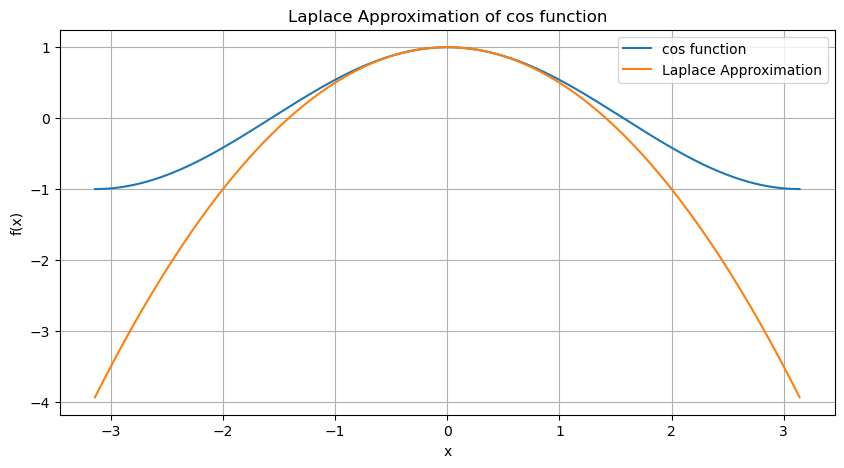

In [12]:
# グラフ描画
plt.figure(figsize=(10, 5))
plt.plot(x, f, label='cos function')
plt.plot(x, laplace_approximation, label='Laplace Approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Laplace Approximation of cos function')
plt.grid(True)
plt.show()